In [15]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
# Load digits
digits = load_digits()
print("Image Data and Labels Shape:", digits.data.shape,  digits.target.shape)
print("Image Data Size:", digits.data[0].size)

Image Data and Labels Shape: (1797, 64) (1797,)
Image Data Size: 64


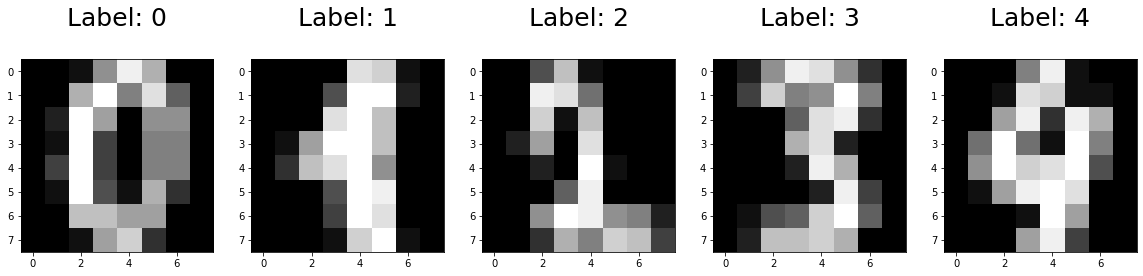

In [53]:
# Display the 5 sample images and their labels
plt.figure(figsize=(20, 10))
for index, (image, label) in enumerate(zip(digits.data[10:15], digits.target[10:15])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title('Label: %i\n' % label, fontsize=25)

In [48]:
test_size = 0.3
n_neighbors = 3

# Split the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=test_size, random_state=0)

In [49]:
# Initialize the KNN model
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
clf_knn.fit(x_train, y_train)
# Evaluate/predict the test data
knn_predictions = clf_knn.predict(x_test)

In [50]:
clf_svm = svm.SVC()#gamma=0.001, C=100.)
clf_svm.fit(x_train, y_train)
SVM_predictions = clf_svm.predict(x_test)

In [51]:
clf_rf = RandomForestClassifier()#max_depth=2, random_state=0)
clf_rf.fit(x_train, y_train)
RF_predictions = clf_rf.predict(x_test)

In [58]:
# Display the results
print("COMP9517  Lab 4 - Solution")
print("\nTest size = %.2f" % test_size)

print("KNN Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, knn_predictions), metrics.recall_score(y_test, knn_predictions, average='macro')))
print("SVM Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, SVM_predictions), metrics.recall_score(y_test, SVM_predictions, average='macro')))
print("RF Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, RF_predictions), metrics.recall_score(y_test, RF_predictions, average='macro')))

print("\nSVM Confusion Matrix:")
print(metrics.confusion_matrix(y_test, SVM_predictions))

COMP9517  Lab 4 - Solution

Test size = 0.30
KNN Accuracy:  0.987 	 Recall: 0.987 
SVM Accuracy:  0.991 	 Recall: 0.991 
RF Accuracy:  0.980 	 Recall: 0.980 

SVM Confusion Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]
